In [636]:
## Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [637]:
## Load and Prepare Dataset

from sklearn.datasets import load_breast_cancer

data=load_breast_cancer()

X = data['data']
y = data['target']

X = tf.keras.utils.normalize(X, order=1)

X_train = X[:456]
X_test = X[456:]

y_train = y[:456]
y_test = y[456:]

In [638]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [639]:
## There seems to be many more benign than malignant
np.bincount(y)[0]

212

In [640]:
## Normalized input dataset

dfx = pd.DataFrame(data=X,
                   columns=data.feature_names)

dfx

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.005045,0.002911,0.034435,0.280693,0.000033,0.000078,0.000084,0.000041,0.000068,0.000022,...,0.007117,0.004860,0.051764,0.566152,0.000045,0.000187,0.000200,0.000074,0.000129,0.000033
1,0.005499,0.004750,0.035526,0.354458,0.000023,0.000021,0.000023,0.000019,0.000048,0.000015,...,0.006680,0.006258,0.042449,0.522866,0.000033,0.000050,0.000065,0.000050,0.000074,0.000024
2,0.005813,0.006273,0.038378,0.355140,0.000032,0.000047,0.000058,0.000038,0.000061,0.000018,...,0.006958,0.007537,0.045020,0.504518,0.000043,0.000125,0.000133,0.000072,0.000107,0.000026
3,0.009210,0.016435,0.062564,0.311371,0.000115,0.000229,0.000195,0.000085,0.000209,0.000079,...,0.012024,0.021371,0.079734,0.457822,0.000169,0.000699,0.000554,0.000208,0.000535,0.000140
4,0.006081,0.004298,0.040489,0.388709,0.000030,0.000040,0.000059,0.000031,0.000054,0.000018,...,0.006755,0.004996,0.045614,0.472025,0.000041,0.000061,0.000120,0.000049,0.000071,0.000023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.005283,0.005486,0.034796,0.362417,0.000027,0.000028,0.000060,0.000034,0.000042,0.000014,...,0.006236,0.006469,0.040701,0.496700,0.000035,0.000052,0.000101,0.000054,0.000050,0.000017
565,0.005755,0.008076,0.037508,0.360503,0.000028,0.000030,0.000041,0.000028,0.000050,0.000016,...,0.006773,0.010935,0.044312,0.494870,0.000033,0.000055,0.000092,0.000047,0.000074,0.000019
566,0.007003,0.011847,0.045691,0.362027,0.000036,0.000043,0.000039,0.000022,0.000067,0.000024,...,0.008008,0.014395,0.053454,0.474209,0.000048,0.000131,0.000144,0.000060,0.000094,0.000033
567,0.005684,0.008093,0.038656,0.349036,0.000033,0.000076,0.000097,0.000042,0.000066,0.000019,...,0.007102,0.010877,0.050934,0.502447,0.000046,0.000240,0.000259,0.000073,0.000113,0.000034


In [641]:
## Normalized Training Input

dfx_train = pd.DataFrame(data=X_train,
                         columns=data.feature_names)

dfx_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.005045,0.002911,0.034435,0.280693,0.000033,0.000078,0.000084,0.000041,0.000068,0.000022,...,0.007117,0.004860,0.051764,0.566152,0.000045,0.000187,0.000200,0.000074,0.000129,0.000033
1,0.005499,0.004750,0.035526,0.354458,0.000023,0.000021,0.000023,0.000019,0.000048,0.000015,...,0.006680,0.006258,0.042449,0.522866,0.000033,0.000050,0.000065,0.000050,0.000074,0.000024
2,0.005813,0.006273,0.038378,0.355140,0.000032,0.000047,0.000058,0.000038,0.000061,0.000018,...,0.006958,0.007537,0.045020,0.504518,0.000043,0.000125,0.000133,0.000072,0.000107,0.000026
3,0.009210,0.016435,0.062564,0.311371,0.000115,0.000229,0.000195,0.000085,0.000209,0.000079,...,0.012024,0.021371,0.079734,0.457822,0.000169,0.000699,0.000554,0.000208,0.000535,0.000140
4,0.006081,0.004298,0.040489,0.388709,0.000030,0.000040,0.000059,0.000031,0.000054,0.000018,...,0.006755,0.004996,0.045614,0.472025,0.000041,0.000061,0.000120,0.000049,0.000071,0.000023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,0.006445,0.008225,0.042015,0.391855,0.000034,0.000032,0.000054,0.000030,0.000055,0.000018,...,0.007054,0.010186,0.045996,0.467528,0.000050,0.000061,0.000131,0.000048,0.000075,0.000020
452,0.009694,0.022804,0.062015,0.357454,0.000068,0.000052,0.000033,0.000016,0.000130,0.000049,...,0.010574,0.030600,0.068720,0.423047,0.000098,0.000150,0.000146,0.000057,0.000198,0.000066
453,0.008635,0.008308,0.055780,0.382844,0.000065,0.000055,0.000041,0.000039,0.000098,0.000036,...,0.009390,0.010061,0.061272,0.445661,0.000080,0.000088,0.000082,0.000064,0.000155,0.000046
454,0.009134,0.012413,0.058352,0.356757,0.000062,0.000039,0.000021,0.000016,0.000130,0.000042,...,0.010379,0.016032,0.066314,0.458522,0.000089,0.000110,0.000137,0.000071,0.000237,0.000053


In [723]:
## Build model

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30)),
    tf.keras.layers.Dense(900, activation="relu"),
    tf.keras.layers.Dense(400, activation="relu"),
    tf.keras.layers.Dense(60, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [724]:
## Compile Model

model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics="accuracy")

In [725]:
## Fit Model

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
15/15 [==============================] - 0s 17ms/step - loss: 0.6866 - accuracy: 0.5921 - val_loss: 0.6593 - val_accuracy: 0.7699
Epoch 2/30
15/15 [==============================] - 0s 7ms/step - loss: 0.6786 - accuracy: 0.5921 - val_loss: 0.6410 - val_accuracy: 0.7699
Epoch 3/30
15/15 [==============================] - 0s 8ms/step - loss: 0.6731 - accuracy: 0.5921 - val_loss: 0.6267 - val_accuracy: 0.7699
Epoch 4/30
15/15 [==============================] - 0s 7ms/step - loss: 0.6668 - accuracy: 0.5921 - val_loss: 0.6104 - val_accuracy: 0.7699
Epoch 5/30
15/15 [==============================] - 0s 8ms/step - loss: 0.6599 - accuracy: 0.5921 - val_loss: 0.6073 - val_accuracy: 0.7699
Epoch 6/30
15/15 [==============================] - 0s 7ms/step - loss: 0.6530 - accuracy: 0.5965 - val_loss: 0.6081 - val_accuracy: 0.7699
Epoch 7/30
15/15 [==============================] - 0s 7ms/step - loss: 0.6426 - accuracy: 0.6075 - val_loss: 0.5892 - val_accuracy: 0.7699
Epoch 8/30
15/15 [=

In [726]:
## Evaluate Model 

## Should be same as the most recent epoch's validation accuracy since using same validation data 
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.8938


[0.23990271985530853, 0.8938053250312805]

In [727]:
## Plot loss and accuracy vs epoch

def plot_loss_curves(history):
    loss = history.history["loss"]
    accuracy = history.history["accuracy"]
    val_loss = history.history["val_loss"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))
    
    plt.figure(figsize=(15, 10))
    plt.plot(epochs, accuracy, label="accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")

    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.title("Accuracy vs Epoch")
    plt.legend()

    plt.figure(figsize=(15, 10))
    plt.plot(epochs, loss, label="loss")
    plt.plot(epochs, val_loss, label="val_loss")

    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.title("Loss vs Epoch")
    plt.legend()

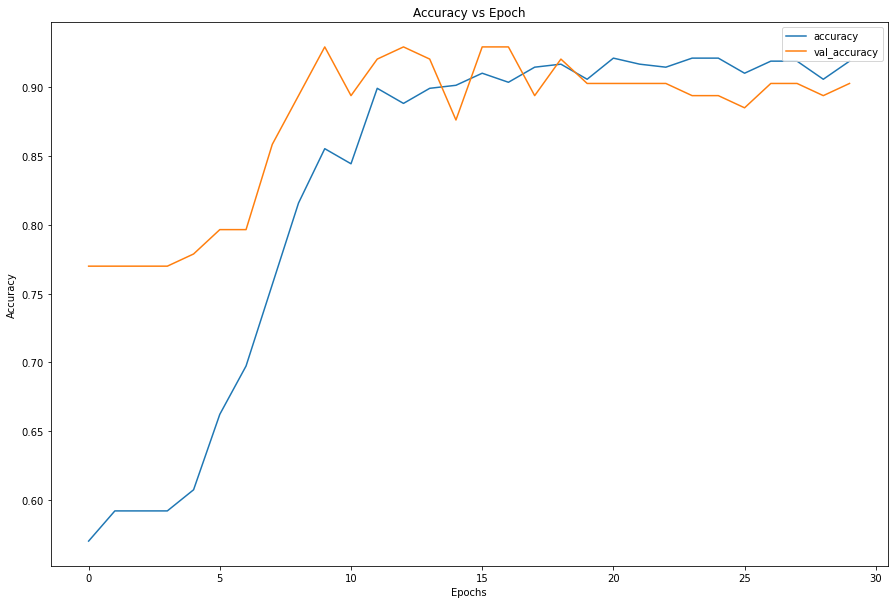

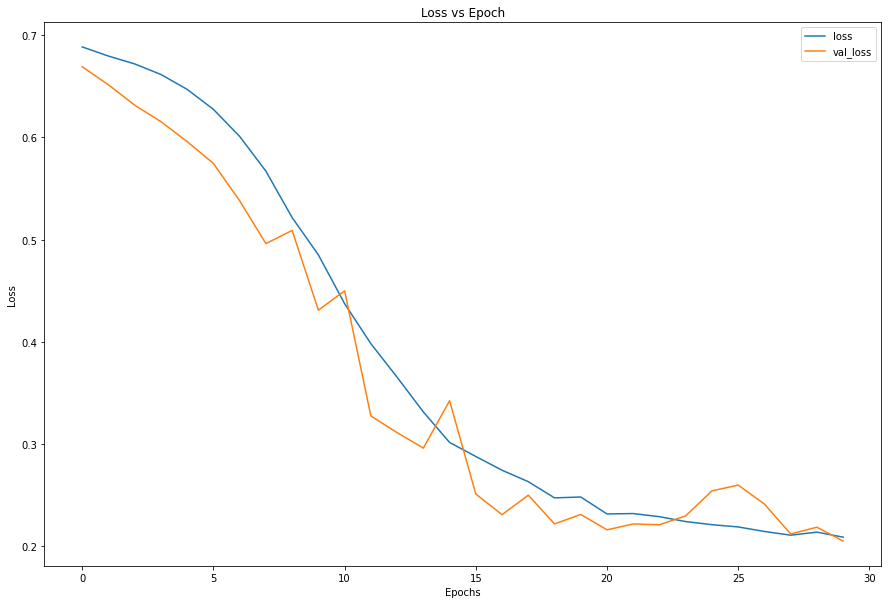

In [722]:
## Plot

## Check for overfit, underfit, and room for improvement

plot_loss_curves(history)